In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
X = data.drop(['price'],axis=1)
y = data['price']

In [4]:
def preprocess_data(features, labels):
    if isinstance(features, pd.DataFrame):
        features = features.apply(LabelEncoder().fit_transform)
    features = features.to_numpy(dtype=float)
    labels = labels.to_numpy(dtype=float)
    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    return features, labels

square trick:

w` = w + x*(y - y_hat)*learning_rate

b` = b + (y - y_hat)*learning_rate

In [8]:
def square_trick(w, b, x, y, learn_rate):
    y_hat = np.dot(w, x) + b
    w_new = w + x * (y - y_hat) * learn_rate
    b_new = b + (y - y_hat) * learn_rate
    return w_new, b_new

In [9]:
def rmse(labels, predictions):
    m = len(labels)
    differences = labels - predictions
    return np.sqrt((1 / (2 * m)) * np.dot(differences.T, differences))

In [10]:
def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    features, labels = preprocess_data(features, labels)
    num_features = features.shape[1] 
    w = np.random.random(num_features) 
    b = np.random.random()
    errors = [] 
    total_rmse = 0
    for i in range(epochs):
        predictions = np.dot(features, w) + b
        epoch_rmse = rmse(labels, predictions)
        errors.append(epoch_rmse)
        total_rmse += epoch_rmse
        i = random.randint(0, len(features) - 1)
        x = features[i]
        y = labels[i]
        w, b = square_trick(w, b, x, y, learning_rate)
    return w, b, errors ,  total_rmse

In [44]:
w, b, errors, total_rmse = linear_regression(X, y, learning_rate=0.001, epochs=10000)

print("Final Weight:", w)
print("Final Bias:", b)
print("Total RMSE Summation:", f'{total_rmse:.4f}')

Final Weight: [ 552205.51722437  106955.21579227  454702.55898741  375517.06381511
  120986.17584205   81058.32382975  186808.00014282  209145.69282111
  365202.11835652  220675.10564629  261298.07799999 -173428.56085062]
Final Bias: 4777867.698883974
Total RMSE Summation: 9465986489.0636


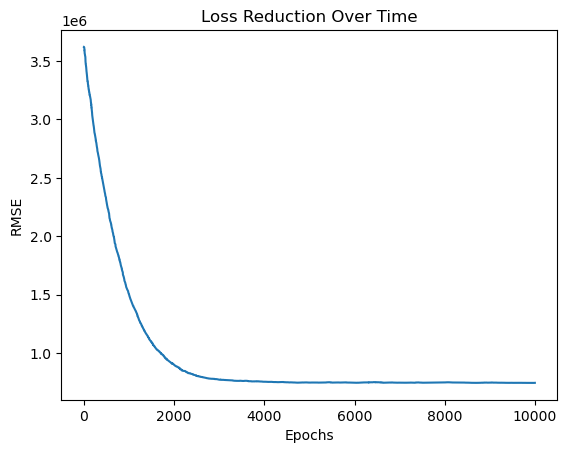

In [12]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Loss Reduction Over Time")
plt.show()

Here we are using SGD.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [28]:
X_pre,y_pre = preprocess_data(X,y)

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X_pre,y_pre ,test_size = 0.2 ,random_state=42)
model = LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [38]:
eval = root_mean_squared_error(y_test,y_pred)

In [46]:
print(f'RMSE using sklearn is : {eval:.4f}')
print(f'RMSE using manual implementation  is : {total_rmse:.4f}')

RMSE using sklearn is : 1342020.7406
RMSE using manual implementation  is : 9465986489.0636


So sklearn wins :)